In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


In [9]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: No module named 'tensorflow_docs'

In [71]:
X_train = pd.read_csv('pca_trainset.csv', index_col=False)
y_train = pd.read_csv('labels.csv', index_col=False)
X_Event = pd.read_csv('Event.csv', index_col=None)
X_Event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  300 non-null    int64
 1   Event       300 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


In [72]:
y_train.drop('Unnamed: 0',axis=1, inplace=True)
X_Event.drop('Unnamed: 0',axis=1, inplace=True)

In [73]:
y_train = y_train[['SurvivalTime']]
y_train.head()

,SurvivalTime
0,1378
1,379
2,573
3,959
4,2119


In [74]:
X_train.drop('Unnamed: 0',axis=1, inplace=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-4.739383,1.185581,-0.237471,-1.235119,0.074996,0.053067,-0.333019,-0.901298,-1.522291,-0.353196,-1.358856,0.573235,-0.489527,0.280751
1,0.338739,0.840441,0.102578,-0.896285,-1.219513,-1.422837,-0.719639,-0.105425,-1.576390,-0.066875,-0.526690,0.104341,-0.152862,-0.169475
2,3.525292,-2.751386,0.479910,0.633147,-0.782358,-0.467185,-0.915767,-0.117116,-1.581772,0.677253,-0.580206,-0.165360,-0.307849,0.086172
3,-0.298156,-1.515961,-0.332009,-0.509088,-1.363442,-0.714078,-0.327450,1.040850,-1.648096,0.037836,-0.441222,0.366744,-0.088439,-0.175295
4,1.485673,1.119828,-0.364601,-1.443434,1.193013,-2.445686,-0.772851,1.111173,-1.505889,-0.668700,-0.335776,0.264594,0.580487,-0.367877


In [75]:
X_concat = pd.concat([X_Event, X_train], axis=1, ignore_index=False)
#X_concat['Event'] = X_concat['Event'].apply(str)
X_concat.head()

,Event,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,-4.739383,1.185581,-0.237471,-1.235119,0.074996,0.053067,-0.333019,-0.901298,-1.522291,-0.353196,-1.358856,0.573235,-0.489527,0.280751
1,1,0.338739,0.840441,0.102578,-0.896285,-1.219513,-1.422837,-0.719639,-0.105425,-1.576390,-0.066875,-0.526690,0.104341,-0.152862,-0.169475
2,1,3.525292,-2.751386,0.479910,0.633147,-0.782358,-0.467185,-0.915767,-0.117116,-1.581772,0.677253,-0.580206,-0.165360,-0.307849,0.086172
3,0,-0.298156,-1.515961,-0.332009,-0.509088,-1.363442,-0.714078,-0.327450,1.040850,-1.648096,0.037836,-0.441222,0.366744,-0.088439,-0.175295
4,0,1.485673,1.119828,-0.364601,-1.443434,1.193013,-2.445686,-0.772851,1.111173,-1.505889,-0.668700,-0.335776,0.264594,0.580487,-0.367877


In [76]:
X_concat.dtypes

Event      int64
0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
dtype: object

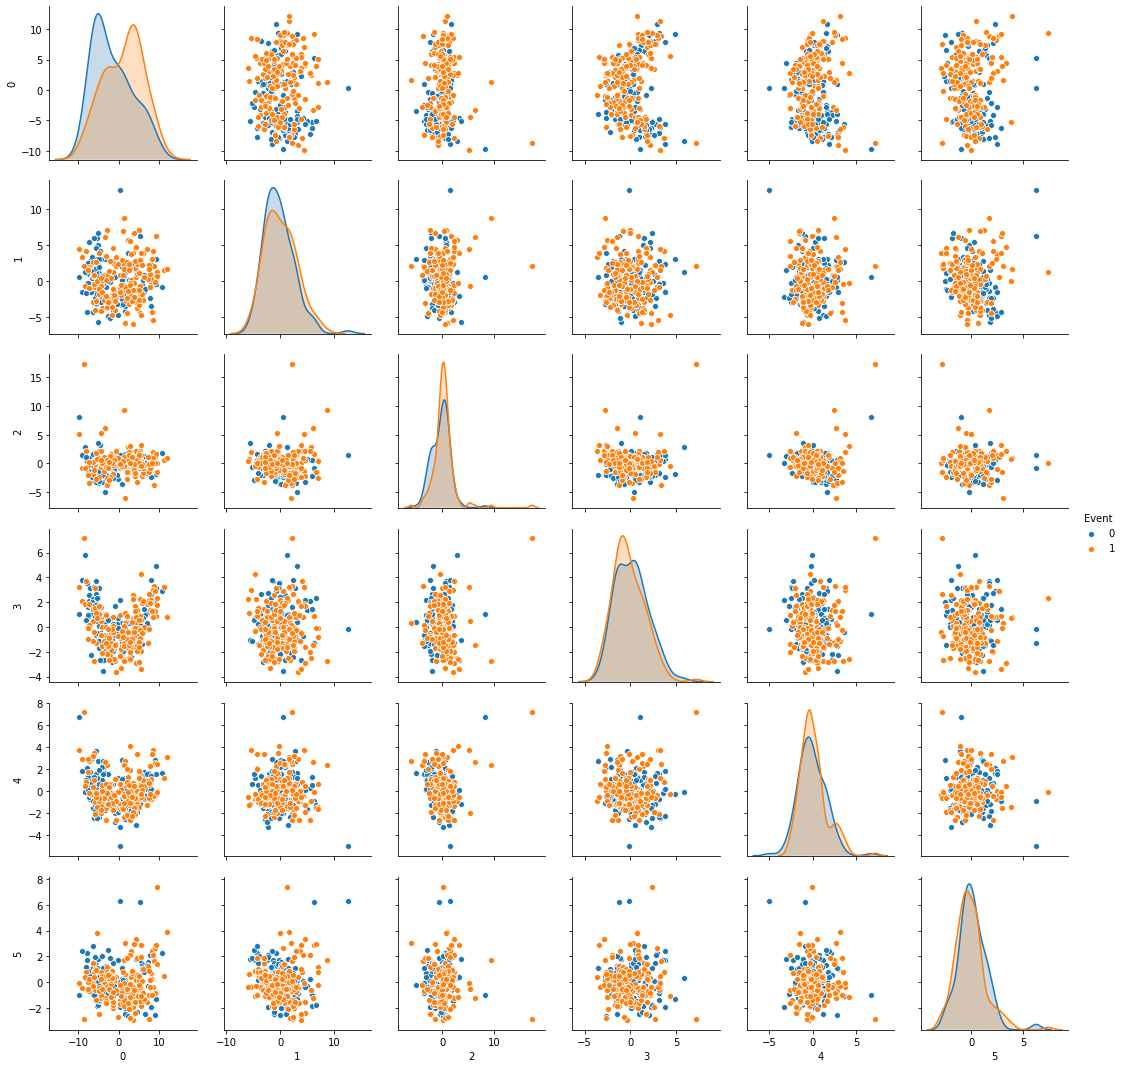

In [80]:
sns.pairplot(X_concat, hue='Event', vars=['0','1','2','3','4','5'])

In [84]:
round(X_concat.describe().transpose(), 4)

,count,mean,std,min,25%,50%,75%,max
Event,300.0,0.54,0.4992,0.0000,0.0000,1.0000,1.0000,1.0000
0,300.0,-0.00,5.0563,-9.7978,-4.5172,-0.1122,4.0430,12.0833
1,300.0,-0.00,2.8616,-5.8646,-2.1477,-0.3339,1.9062,12.5785
2,300.0,-0.00,2.0049,-5.9914,-0.8684,0.1096,0.8610,17.2605
3,300.0,-0.00,1.7550,-3.6032,-1.3084,-0.1404,1.0572,7.1362
4,300.0,0.00,1.5552,-4.9665,-1.0551,-0.2107,0.7497,7.1192
5,300.0,-0.00,1.4238,-2.9272,-0.8262,-0.1588,0.7089,7.4274
6,300.0,0.00,1.1395,-4.9442,-0.5524,-0.1698,0.3588,7.7937
7,300.0,0.00,1.0988,-5.7743,-0.5766,-0.0256,0.6329,7.4805
8,300.0,-0.00,1.0009,-2.0566,-0.8468,-0.0082,0.8475,2.1231


In [87]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [88]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [90]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.54281443],
       [-0.41653118],
       [-0.38063803],
       [-0.14467832],
       [ 0.11878707],
       [-0.4646183 ],
       [-0.5790411 ],
       [-0.55958575],
       [-0.28883803],
       [-0.06512204]], dtype=float32)

In [109]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

ModuleNotFoundError: No module named 'tensorflow_docs'

In [113]:
EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [94]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,168140.831250,293.770508,168140.828125,531490.008333,563.647156,531490.0000,995
996,167224.376042,293.419617,167224.390625,534207.125000,565.221069,534207.1250,996
997,167060.793750,294.372223,167060.796875,532482.929167,563.447815,532482.9375,997
998,167283.054167,293.753448,167283.046875,529179.637500,560.789917,529179.6250,998
999,166641.947396,293.130798,166641.953125,532742.097917,563.932861,532742.1250,999


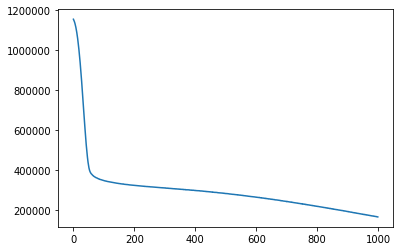

In [107]:
plt.plot(hist.mean_squared_error)

In [110]:
model = build_model()

In [122]:
data = pd.read_csv('Test set/features/radiomics.csv', index_col=False)
data.drop([0,1], axis =0, inplace=True)
PatientId = data.pop("Unnamed: 0")
data.head()

,shape,shape.1,shape.2,shape.3,shape.4,shape.5,shape.6,shape.7,firstorder,firstorder.1,...,textural.21,textural.22,textural.23,textural.24,textural.25,textural.26,textural.27,textural.28,textural.29,textural.30
2,0.02888521807913762,0.2964514286695039,106.90182411914213,1.4997383054588147,0.6667829956467439,29085.541425363514,0.11452777845917761,254069.0,2006942430.0,3.073901204913679,...,5.786838511970755,21219.447221119444,64776.69757926393,0.5670945839364655,0.0014934974903616607,808.353957091605,0.0010936026706116241,554.1119978588921,0.007534740404869377,4654.031975617358
3,0.03194837238720588,0.36266005403772866,18.81488772222678,1.402275757481352,0.7131264978837789,629.44364000626,0.7038788258387029,911.0,262393816.0,5.206990174813962,...,1.1603967538271833,25.291607680973797,795.6752799214078,0.9534746263615637,0.011646089610174305,548.9645727442402,0.010835520680564275,529.6440291417058,0.01563269704193925,639.6219629172265
4,0.015998834925719053,0.0909450279994979,105.08092119885512,2.223687115406422,0.4497035545476147,12509.265443769824,0.3152976995595148,39809.0,665032231.0,3.2623265669273813,...,4.064385250880343,3225.8083324725712,14007.50928452286,0.6442474353499499,0.0011709310388930345,1600.9522654535785,0.001003034008071181,1181.3777735448612,0.003026516852404476,7156.937666524343
5,0.031357660885439724,0.3493731813120354,46.968074263269514,1.419831515538599,0.7043089190907696,4067.6573722770927,0.28210398587121804,14458.0,375428731.0,3.5898612979729365,...,2.902585983552506,1147.928169625991,6094.8055835410405,0.7114666354533556,0.0021042753512783884,1533.2177880035028,0.0018997254630333837,1182.8763633701415,0.003685003163801367,4776.549407884615
6,0.017814538285697575,0.1127590447058208,56.542019772908716,2.069900823752435,0.4831149340706782,7093.365689658921,0.37603157853867447,18942.0,9108915274.0,5.067417641320739,...,1.195504779594246,652.0713671481254,15924.101510304838,0.942025454220576,0.01928124971242974,344.20578608557054,0.01822101655661966,331.90121216251634,0.024175162483351866,400.01584748374046


In [131]:
#Assign predictors to a variable of ndarray (matrix) type
array = data.values
X_test = array[:,:]

from sklearn.preprocessing import StandardScaler

# Normalize the  data (center around 0 and scale to 1 standard deviation).
scaler = StandardScaler()
Xt = scaler.fit_transform(X_test)

from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=14)
fit = pca.fit(Xt)

X_test = pca.transform(Xt)
X_test

array([[ 6.39846581, -2.14406455,  2.77902024, ..., -0.50695832,
        -0.26129505, -0.25187413],
       [-7.14442518, -2.51124525,  0.1945133 , ...,  0.03984893,
         0.51550809, -0.44487617],
       [ 5.37749637,  1.01607729,  0.37199018, ...,  0.23927729,
        -0.33237514, -0.07818387],
       ...,
       [-0.73772778, -3.30934027, -3.17803336, ..., -0.34533719,
         0.40814514,  0.62446479],
       [ 3.9193301 , -1.18816117,  2.86007489, ...,  0.31745886,
        -0.15381282, -0.23343958],
       [ 4.63218942,  0.43872556, -0.78599766, ..., -0.01901715,
        -0.17897492,  0.23336044]])

In [133]:
test_predictions = model.predict(X_test).flatten()
test_predictions

array([ 500.70502, 1350.0862 ,  562.3672 ,  536.102  , 1227.7941 ,
       2036.3726 , 1772.7972 ,  886.3938 ,  463.53842,  360.1418 ,
       1045.1185 ,  873.52686, 1177.2515 , 1069.3638 ,  370.03943,
        426.14215,  631.7945 ,  -16.1757 ,  912.458  , 1432.0293 ,
       1006.64923, 1088.0862 ,  378.5473 ,  610.3043 ,  824.8158 ,
        523.9085 ,  678.19226,  541.4042 ,  688.2383 , 1779.0273 ,
        320.36713, 1328.725  , 1164.6624 ,  333.2685 , 1169.7947 ,
       1220.6772 ,  328.58133, 1080.365  ,  383.69427,  515.13635,
        672.3877 , 2898.5437 ,  541.8417 ,  919.409  ,  690.7944 ,
       1023.73987,  487.22348, 1766.8972 , 2048.9084 , 1241.1355 ,
        508.0742 ,  558.6336 ,  453.84628, 1213.6505 ,  743.1909 ,
       1318.898  ,  666.81934,  343.0123 , 1011.0686 ,  655.1897 ,
        146.41203,  430.44904,  478.15845,  481.96588,  701.777  ,
        877.7739 , -239.0865 , 1185.6521 ,  678.87036, 1202.3862 ,
        393.43097,  914.9008 , 1515.0992 , 1472.0974 , -341.49